<a href="https://colab.research.google.com/github/rishabh422tiwari/Backproagation_Introduction/blob/main/Backprop_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
from graphviz import Digraph

In [28]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [29]:

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [30]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

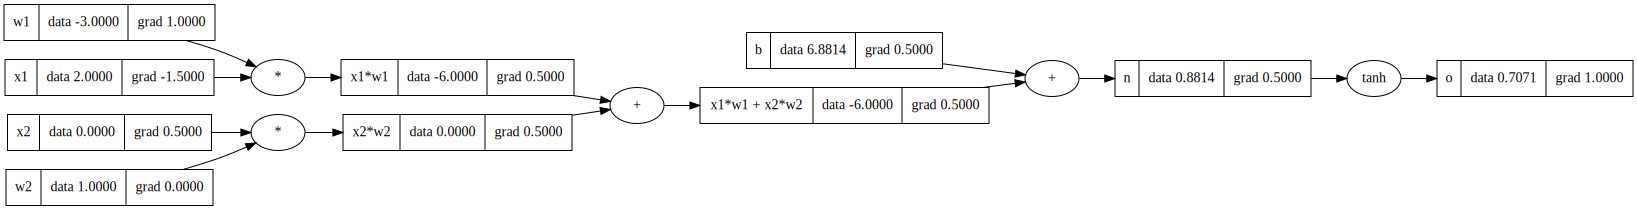

In [31]:
draw_dot(o)

In [32]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

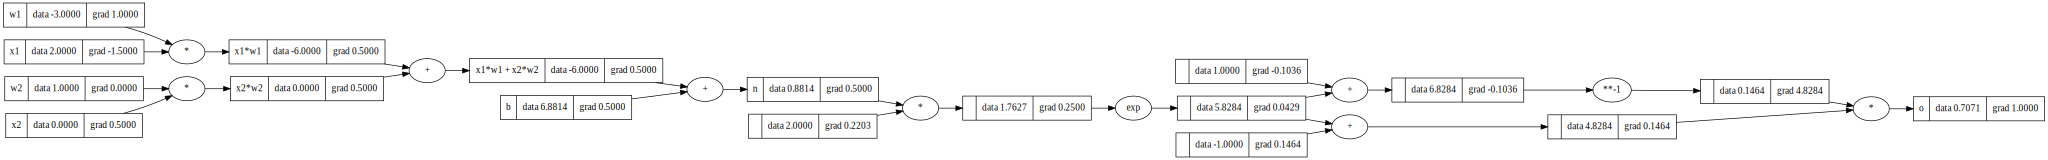

In [33]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)

In [34]:
import torch                              # tensors are just n-dimensional arrays of scalars

x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [36]:
class Neuron:

  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))
  
  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  
  def parameters(self):
    return self.w + [self.b]

class Layer:
  
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [37]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.8859445462094603)

In [41]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
ypred = [n(x) for x in xs]
ypred

[Value(data=0.9402507616912366),
 Value(data=-0.929444439858131),
 Value(data=-0.9178837915584073),
 Value(data=0.9202893239412935)]

In [57]:
len(n.parameters())

41

In [58]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))            # loss function
loss                                                                   # greater the loss is worst our NN is predicting                                                                  

Value(data=0.021644922111969455)

In [67]:
ypred = [n(x) for x in xs]                                       # comback here after gradient descent step
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))      # loss has changed and came from 0.0216 to 0.0172
loss                                                             # low loss means our prrdictions are mtaching the target 

Value(data=0.017269199358042144)

In [59]:
loss.backward()                                                  # it will find the gradients of the weights of a NN

In [60]:
n.layers[0].neurons[0].w[0].grad                                # gradient of this neural is -ve, the influence of neural on the loss is also -ve
                                                                # so slightly increasing this particular weight of this neuron of this layer make the 
                                                                # loss go down and we have this informattion for every weight in the network 

-0.5008800660227266

if the this nerons value goes down that means it increased the loss that is coz deravative of this neuron is negative, so increasing this makes the loss go down.

In [62]:
n.layers[0].neurons[0].w[0].data                                

-0.024917264744470646

In [52]:
#draw_dot(loss)

**Gradients of the input data is not useful to us because inputs data seems to be not changeable**. so it is a fixed input we are not gonna change it or messing with it.

In [64]:
for p in n.parameters():                      # we think of gradient as a vector pointing in the direction of increased loss
    p.data += -0.01 * p.grad                     # in gradient decent we are modifying p.data by small step size in the direction of the gradient
                                              # step size could be like 0.01
                      

Other interpretation for the -ve sign of the step size is as you can think of gradient vector as pointing in the direction of increasing the loss but we want to decrease the loss.

In [65]:
n.layers[0].neurons[0].w[0].data             # it moved little bit to th direction of 1.

-0.01990846408424338

In [88]:
ypred = [n(x) for x in xs]                                            # forward pass
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss     

loss.backward()                                                        # backward pass

for p in n.parameters():
   p.data += -0.01 * p.grad                                             # updation

loss  

Value(data=0.0006059555513157758)

In [90]:
ypred                                                                    # almost there

[Value(data=0.9906969682606184),
 Value(data=-0.9873278836376068),
 Value(data=-0.9871251208008075),
 Value(data=0.9861052490387197)]

if you go too fast or try to make it too big step you may actually overstep coz we don't exactly know about the loss function, loss function has all kinds of structure and we only know about the very local dependence of all these parameters on the loss but if we step too far we may step into part of the loss that is completely different and **that can destablize training and make your loss actually blow up**

In [91]:
n.parameters()

[Value(data=0.05975031571697954),
 Value(data=-0.6213713338959918),
 Value(data=0.8003438912363907),
 Value(data=0.5511901117153535),
 Value(data=-0.7718215651483759),
 Value(data=-0.25690106130054646),
 Value(data=-0.3664671481692538),
 Value(data=-0.588841122015335),
 Value(data=0.8036684551355648),
 Value(data=0.06643232633752195),
 Value(data=-0.6531059505953419),
 Value(data=0.902680600812958),
 Value(data=-0.24476380891741686),
 Value(data=0.30391269553529077),
 Value(data=-1.4865570561876045),
 Value(data=-0.1281919857849359),
 Value(data=-0.8303354128219167),
 Value(data=-0.5192731756165255),
 Value(data=0.2547535070168257),
 Value(data=1.337611754593326),
 Value(data=-0.9420874242123376),
 Value(data=0.7631755196048763),
 Value(data=0.237174433583195),
 Value(data=0.5911261155591218),
 Value(data=0.045916301234390514),
 Value(data=0.43161751041248253),
 Value(data=-0.6350640804393196),
 Value(data=-0.07365040060305401),
 Value(data=-0.10826486062564177),
 Value(data=-0.9005347

Little cleaner Code

In [96]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.037221108002837226)

In [97]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [101]:
for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0                                              # putting intial weights to 0 is important so we can accumulate the loss gradient 
  loss.backward()                                             # for the first time.
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)

0 0.0042241496063684415
1 0.0041606509926520865
2 0.004098950628324825
3 0.004038973651912829
4 0.003980649339111282
5 0.003923910815920572
6 0.0038686947958297717
7 0.003814941338676811
8 0.0037625936290832237
9 0.003711597772596157
10 0.003661902607874831
11 0.0036134595334383337
12 0.00356622234764942
13 0.0035201471007471367
14 0.0034751919578642028
15 0.003431317072072387
16 0.003388484466595343
17 0.003346657925412903
18 0.003305802891556493
19 0.003265886372462253
